In [1]:
import pandas as pd #importing libraries

In [2]:
import matplotlib

In [3]:
%matplotlib inline

In [4]:
df1 = pd.read_csv(r"C:\Users\sando\Documents\sugarproject\sugar in soda.csv")#importing csv

In [5]:
df2 = pd.read_csv(r"C:\Users\sando\Documents\sugarproject\calories in soda - Sheet1.csv")

In [6]:
df3 = pd.read_csv(r"C:\Users\sando\Documents\sugarproject\sugar in energy drinks.csv")

In [7]:
df4 = pd.read_csv(r"C:\Users\sando\Documents\sugarproject\calories in energy drinks.csv")

In [8]:
df1

,drink 20oz,sugar amount in g,caffeine in mg,sodium in mg
0,coca-cola,65,57,75
1,dr pepper,64,68,100
2,pepsi,69,63,55
3,sprite,64,0,110
4,mtn dew,77,91,105
5,fanta,73,0,90
6,a&w root beer,72,0,135
7,canada dry,59,0,80
8,orange crush,71,0,120


In [9]:
df2

,drink 20oz,calories
0,coca-cola,240
1,dr pepper,250
2,pepsi,250
3,sprite,230
4,mtn dew,290
5,fanta,270
6,a&w root beer,270
7,canada dry,230
8,orange crush,270


In [10]:
soda_nf = pd.merge(df2, df1)#merges the calories columns with df1 table

In [11]:
soda_nf #displays my new table called ""

,drink 20oz,calories,sugar amount in g,caffeine in mg,sodium in mg
0,coca-cola,240,65,57,75
1,dr pepper,250,64,68,100
2,pepsi,250,69,63,55
3,sprite,230,64,0,110
4,mtn dew,290,77,91,105
5,fanta,270,73,0,90
6,a&w root beer,270,72,0,135
7,canada dry,230,59,0,80
8,orange crush,270,71,0,120


<AxesSubplot:xlabel='drink 20oz'>

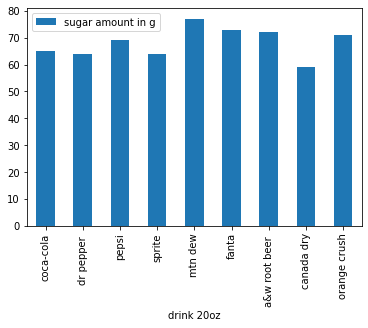

In [12]:
soda_nf.plot.bar(x='drink 20oz', y='sugar amount in g')#Now, lets compare the sugar content

In [13]:
energy_nf = pd.merge(df3, df4)#merging the energy drinks

In [14]:
energy_nf

,drink 16oz,sugar amount in g,caffeine in mg,sodium in mg,calories
0,monster energy,54,160,370,230
1,red bull,51,151,190,210
2,mtn dew kickstart grape,20,90,170,80
3,rockstar original,63,160,70,250
4,bang blue razz,0,300,40,0
5,full throttle,58,160,160,220
6,vuka renew mango peach,44,160,0,180
